### 任务1:微调在ImageNet上预训练的卷积神经网络实现鸟类识别

下面是使用PyTorch实现在ImageNet上预训练的ResNet-18模型进行鸟类识别的代码示例：

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.utils.tensorboard import SummaryWriter

In [2]:
#加载数据集
from dataset_image import CUB
import transforms
from torch.utils.data import DataLoader
import time

time1 = time.time()
IMAGE_SIZE = 448
TRAIN_MEAN = [0.48560741861744905, 0.49941626449353244, 0.43237713785804116]
TRAIN_STD = [0.2321024260764962, 0.22770540015765814, 0.2665100547329813]
TEST_MEAN = [0.4862169586881995, 0.4998156522834164, 0.4311430419332438]
TEST_STD = [0.23264268069040475, 0.22781080253662814, 0.26667253517177186]

path = 'CUB_200_2011/CUB_200_2011'
train_transforms = transforms.Compose([
        transforms.ToCVImage(),
        transforms.RandomResizedCrop(IMAGE_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(TRAIN_MEAN, TRAIN_STD)
    ])

test_transforms = transforms.Compose([
    transforms.ToCVImage(),
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(TEST_MEAN,TEST_STD)
    ])

train_dataset = CUB(
        path,
        train=True,
        transform=train_transforms,
        target_transform=None
    )
    # print(len(train_dataset))
train_dataloader = DataLoader(
    train_dataset,
    batch_size=16,
    num_workers=4,
    shuffle=True
)

test_dataset = CUB(
        path,
        train=False,
        transform=test_transforms,
        target_transform=None
    )

test_dataloader = DataLoader(
    test_dataset,
    batch_size=16,
    num_workers=4,
    shuffle=True
)

time2 = time.time()

print(time2-time1)
train_len = train_dataset.__len__()
test_len = test_dataset.__len__()


0.04423046112060547


### 优化动量

Training with learning rate: 0.1


/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512
Epoch 1/26
----------
train Loss: 5.3687 Acc: 0.0063
val Loss: 5.2851 Acc: 0.0093
Epoch 2/26
----------
train Loss: 5.2502 Acc: 0.0118
val Loss: 5.2092 Acc: 0.0155
Epoch 3/26
----------
train Loss: 5.1819 Acc: 0.0219
val Loss: 5.1437 Acc: 0.0238
Epoch 4/26
----------
train Loss: 5.1098 Acc: 0.0319
val Loss: 5.0715 Acc: 0.0343
Epoch 5/26
----------
train Loss: 5.0317 Acc: 0.0432
val Loss: 4.9877 Acc: 0.0459
Epoch 6/26
----------
train Loss: 4.9457 Acc: 0.0516
val Loss: 4.9057 Acc: 0.0544
Epoch 7/26
----------
train Loss: 4.8590 Acc: 0.0616
val Loss: 4.8176 Acc: 0.0671
Epoch 8/26
----------
train Loss: 4.7759 Acc: 0.0799
val Loss: 4.7398 Acc: 0.0778
Epoch 9/26
----------
train Loss: 4.6916 Acc: 0.0908
val Loss: 4.6563 Acc: 0.0894
Epoch 10/26
----------
train Loss: 4.6122 Acc: 0.1161
val Loss: 4.5713 Acc: 0.1008
Epoch 11/26
----------
train Loss: 4.5284 Acc: 0.1245
val Loss: 4.4877 Acc: 0.1141
Epoch 12/26
----------
train Loss: 4.4524 Acc: 0.1361
val Loss: 4.4086 Acc: 0.1284
Epoch 13/

/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512
Epoch 1/26
----------
train Loss: 5.3766 Acc: 0.0048
val Loss: 5.2874 Acc: 0.0079
Epoch 2/26
----------
train Loss: 5.2519 Acc: 0.0135
val Loss: 5.1934 Acc: 0.0164
Epoch 3/26
----------
train Loss: 5.1469 Acc: 0.0259
val Loss: 5.0991 Acc: 0.0297
Epoch 4/26
----------
train Loss: 5.0431 Acc: 0.0400
val Loss: 4.9933 Acc: 0.0447
Epoch 5/26
----------
train Loss: 4.9380 Acc: 0.0492
val Loss: 4.8784 Acc: 0.0576
Epoch 6/26
----------
train Loss: 4.8330 Acc: 0.0649
val Loss: 4.7809 Acc: 0.0737
Epoch 7/26
----------
train Loss: 4.7324 Acc: 0.0861
val Loss: 4.6794 Acc: 0.0835
Epoch 8/26
----------
train Loss: 4.6373 Acc: 0.0939
val Loss: 4.5866 Acc: 0.0977
Epoch 9/26
----------
train Loss: 4.5321 Acc: 0.1183
val Loss: 4.4791 Acc: 0.1125
Epoch 10/26
----------
train Loss: 4.4313 Acc: 0.1370
val Loss: 4.3683 Acc: 0.1365
Epoch 11/26
----------
train Loss: 4.3386 Acc: 0.1493
val Loss: 4.2734 Acc: 0.1488
Epoch 12/26
----------
train Loss: 4.2304 Acc: 0.1772
val Loss: 4.1795 Acc: 0.1686
Epoch 13/

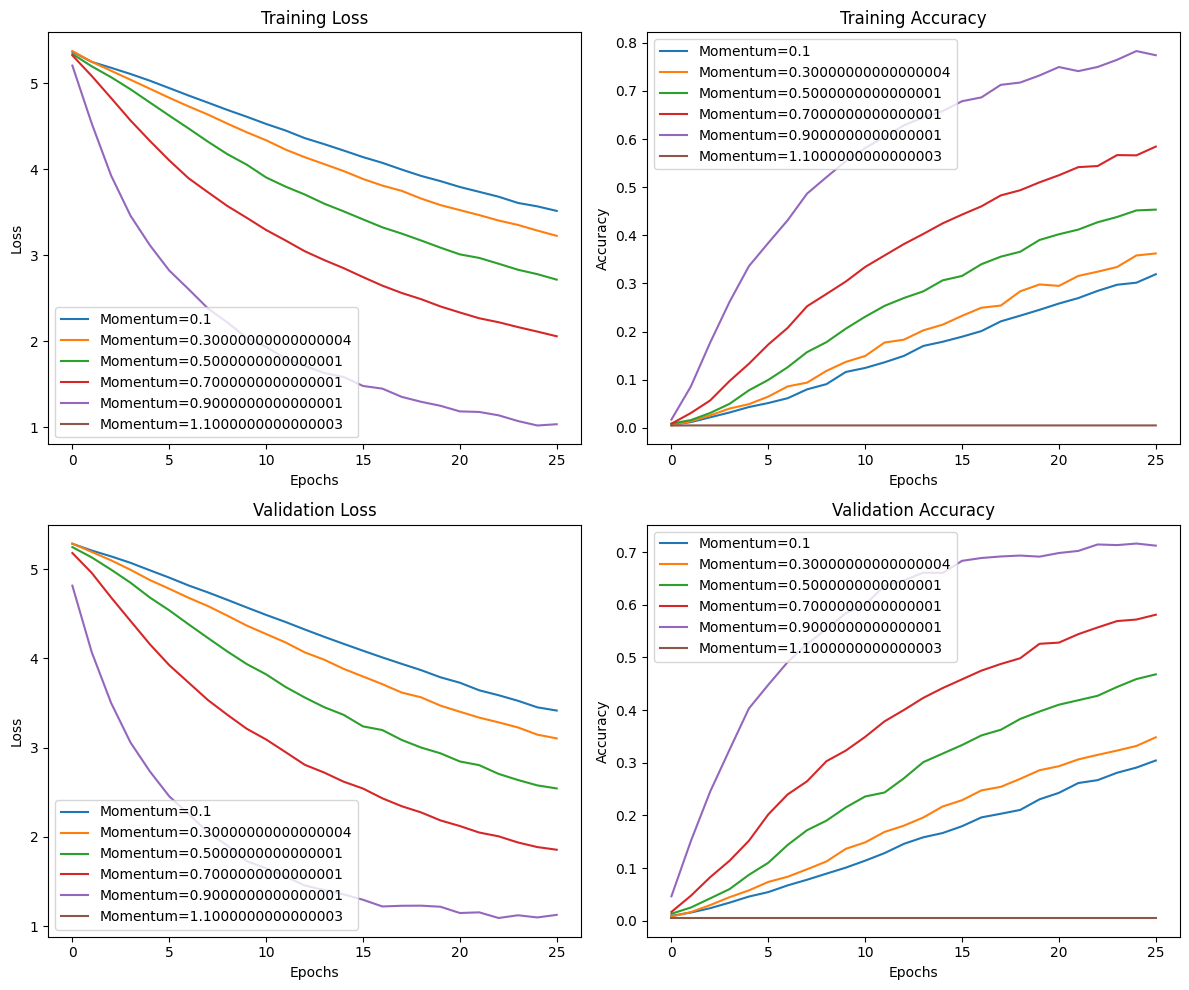

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np


# 存储每个学习率下的损失和准确率
lr_train_losses = []
lr_train_accuracies = []
lr_val_losses = []
lr_val_accuracies = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 训练模型
num_epochs = 26
lrs = np.arange(0.1, 1.2, 0.2)
for lr in lrs:
    print(f'Training with learning rate: {lr}')
    # 加载预训练的ResNet-18模型
    model = models.resnet18(pretrained=True)
    num_ftrs = model.fc.in_features
    print(num_ftrs)
    model.fc = nn.Linear(num_ftrs, 200)  # 将输出层大小设置为200
    model = model.to(device)
    # 假设 model, train_dataloader, test_dataloader 已经定义好了
    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    parameter=model.parameters()
    optimizer = optim.SGD(parameter, lr=0.001, momentum=lr)
    # 初始化变量用于存储损失和精度数据
    train_losses, train_accuracies,val_losses, val_accuracies = [],[], [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                data_len = len(dataloader.dataset)
                model.train()
            else:
                dataloader = test_dataloader
                data_len = len(dataloader.dataset)
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / data_len
            epoch_acc = (running_corrects.double() / data_len).cpu().item()

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
    # 将每个学习率下的整体损失和准确率存储起来
    lr_train_losses.append(train_losses)
    lr_train_accuracies.append(train_accuracies)
    lr_val_losses.append(val_losses)
    lr_val_accuracies.append(val_accuracies)
# 绘制损失和精度图
# 绘制每个学习率下的损失和准确率图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, lr in enumerate(lrs):
    axes[0, 0].plot(lr_train_losses[i], label=f'Momentum={lr}')
    axes[0, 1].plot(lr_train_accuracies[i], label=f'Momentum={lr}')
    axes[1, 0].plot(lr_val_losses[i], label=f'Momentum={lr}')
    axes[1, 1].plot(lr_val_accuracies[i], label=f'Momentum={lr}')

axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

axes[0, 1].set_title('Training Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

axes[1, 0].set_title('Validation Loss')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.tight_layout()
plt.show()